In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
 

# Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv("D:\\Data_Science\\Data_Science_Project\\ml_project\\notebook\\data\\student_performance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


# Preparing X and Y variables

In [6]:
X = df.drop(columns=['math score'],axis=1)

In [7]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,some college,standard,completed,70,78
1,male,group D,associate's degree,standard,none,93,87
2,female,group D,some college,free/reduced,none,76,77
3,male,group B,some college,free/reduced,none,70,63
4,female,group D,associate's degree,standard,none,85,86


In [8]:
print("categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethinicity' variable: ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df["test preparation course"].unique())


categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethinicity' variable:  ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in 'parental level of education' variable:  ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['completed' 'none']


In [9]:
y = df['math score']

In [10]:
y.head()

0    59
1    96
2    57
3    70
4    83
Name: math score, dtype: int64

In [11]:
# Create Column Transformer with type of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.02709151,  0.58994292],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.60407283,  1.18920774],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.39842962,  0.52335794],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         1.10763151,  1.12262276],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.11474887, -0.47541676],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -1.65825585, -1.60736142]])

In [14]:
X.shape

(1000, 19)

In [15]:
# separate dataset into and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Create an Evaluate Function to give all metrics after model Training

In [16]:
def evaluate_model(true,predicted):
    mae = mean_squared_error(true,predicted)
    mse = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_absolute_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [20]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluate Train and Test dataset 
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for training set')
    print("Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print(" R2 Score: {:.4f}".format(model_train_r2))

    print("-----------------------------------")

    print("Model performance for Test set")

    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}",format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('*'*35)
    print('\n')

Linear Regression
Model Performance for training set
Root Mean Squared Error: 2.0969
 R2 Score: 0.8718
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0183
- Mean Absolute Error: {:.4f} 24.950689697265624
- R2 Score: 0.8870
***********************************


Lasso
Model Performance for training set
Root Mean Squared Error: 2.3361
 R2 Score: 0.8074
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3186
- Mean Absolute Error: {:.4f} 46.36226661980758
- R2 Score: 0.7900
***********************************


Ridge
Model Performance for training set
Root Mean Squared Error: 2.0948
 R2 Score: 0.8723
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0182
- Mean Absolute Error: {:.4f} 24.873852996727933
- R2 Score: 0.8873
***********************************


K-Neighbors Regressor
Model Performance for training set
Root Mean Squared Error: 2.1299
 R2 Sc

# Results

In [22]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
2,Ridge,0.887328
0,Linear Regression,0.886980
7,CatBoost Regressor,0.874470
5,Random Forest Regressor,0.853008
8,AdaBoost Regressor,0.834478
6,XGBRegressor,0.826102
3,K-Neighbors Regressor,0.810209
1,Lasso,0.789992
4,Decision Tree,0.741036


# Ridge Regression

In [25]:
li_model = LinearRegression(fit_intercept=True)
li_model = li_model.fit(X_train,y_train)
y_pred = li_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.70


# Plot y_pred and y_test

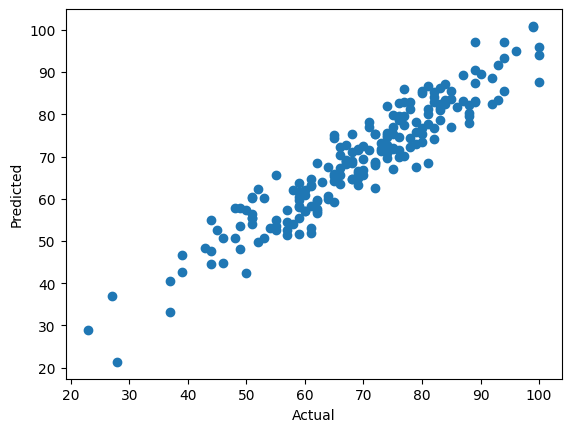

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual");
plt.ylabel("Predicted");

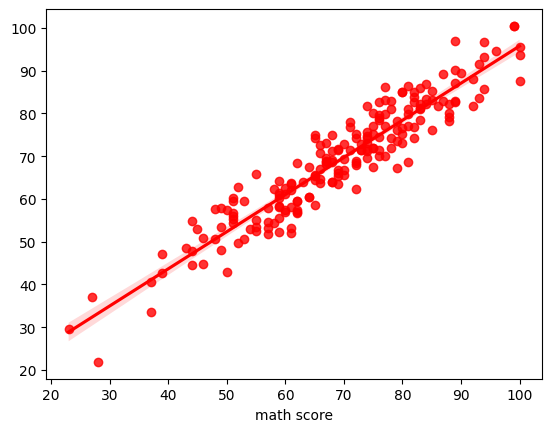

In [26]:
sns.regplot(x=y_test,y=y_pred,color='red');

# Difference between Actual and Predicted Values

In [27]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,"Difference":y_test})
pred_df

,Actual Value,Predicted Value,Difference
521,67,68.250000,67
737,78,81.156250,78
740,39,42.765625,39
660,70,69.375000,70
411,90,89.406250,90
...,...,...,...
408,100,87.515625,100
332,66,70.718750,66
208,66,63.718750,66
613,68,64.078125,68
